In [4]:
import pandas as pd
import pickle
import cv2 as cv
import numpy as np
from textReg import textReg

In [5]:
reg=textReg()
reg.loadData()
info=[]

In [6]:
print(reg.data[0][0].shape)
#cv.imshow('img',reg.data[0][0])
#cv.waitKey(0)
for i,row in enumerate(reg.data):
    #print(i)
    d=[i,row[0].shape[0],row[0].shape[1],row[1],len(row[1])]
    info.append(d)

(43, 130, 3)


In [7]:
info=pd.DataFrame(info,columns=['imageId','height','weight','label','labelLength'])

In [8]:
info.head(5)

,imageId,height,weight,label,labelLength
0,0,43,130,小学生,3
1,1,18,161,sosine,6
2,2,13,9,/,1
3,3,80,467,HALLUWEEN,9
4,4,157,516,很底啦！,4


In [11]:
info['labelLength'].value_counts()[:10].sum()
info['weicutlabel']=info['weight']-info['labelLength']
info.sort_values(by='weicutlabel',ascending=True)

,imageId,height,weight,label,labelLength,weicutlabel
784,784,117,10,.0.20min/r(010-0.4,18,-8
468,468,55,12,MadeinChina,11,1
478,478,34,10,BAISITE,7,3
374,374,62,12,这是一份来自古代的,9,3
759,759,108,14,WneeiPaini,10,4
554,554,14,7,0,1,6
191,191,25,9,20X,3,6
873,873,9,7,\,1,6
173,173,9,7,g,1,6
722,722,14,7,：,1,6


In [10]:
info['labelLength'].value_counts().sum()

140711

In [66]:
info.describe()

,imageId,height,weight,labelLength
count,140711.000000,140711.000000,140711.000000,140711.000000
mean,70355.000000,41.893093,127.518794,5.068459
std,40619.911201,47.836220,135.163851,4.741951
min,0.000000,7.000000,7.000000,1.000000
25%,35177.500000,17.000000,37.000000,2.000000
50%,70355.000000,29.000000,84.000000,4.000000
75%,105532.500000,51.000000,170.000000,6.000000
max,140710.000000,2760.000000,3554.000000,130.000000


In [137]:
w1=info[info['weight']>=20].sort_values(by=['weight'])
h1=info[info['height']>=20].sort_values(by=['height'])
wh=info[info['weight']>=20]
wh=wh[wh['height']>=20].sort_values(by=['weight','height'],ascending=False)
wh=wh[wh['labelLength']<=6].sort_values(by=['weight','height'],ascending=True)
wh=wh[wh['labelLength']>=2].sort_values(by=['weight','height'],ascending=True)

In [138]:
wh.describe()

,imageId,height,weight,labelLength
count,60501.000000,60501.000000,60501.000000,60501.000000
mean,70381.521958,55.424952,148.477050,3.669229
std,40684.293710,48.695573,109.609119,1.289683
min,0.000000,20.000000,20.000000,2.000000
25%,35015.000000,30.000000,73.000000,2.000000
50%,70433.000000,43.000000,121.000000,4.000000
75%,105662.000000,65.000000,194.000000,4.000000
max,140706.000000,2496.000000,2987.000000,6.000000


In [143]:
wh.head(30)

,imageId,height,weight,label,labelLength
4021,4021,20,20,女人,2
18681,18681,20,20,P1,2
22039,22039,20,20,2V,2
30002,30002,20,20,上市,2
68017,68017,20,20,45,2
86731,86731,20,20,sb,2
94403,94403,20,20,中！,2
123851,123851,20,20,XI,2
138614,138614,20,20,160,3
139443,139443,20,20,AZ,2


In [140]:
h1.describe()

,imageId,height,weight,labelLength
count,96500.000000,96500.000000,96500.000000,96500.000000
mean,70321.056912,54.701938,160.326891,4.738435
std,40590.990263,53.006912,147.930115,3.922326
min,0.000000,20.000000,7.000000,1.000000
25%,35152.500000,28.000000,59.000000,2.000000
50%,70299.500000,41.000000,119.000000,4.000000
75%,105453.250000,63.000000,214.000000,6.000000
max,140709.000000,2760.000000,3554.000000,85.000000


In [13]:
import matplotlib.pyplot as plt  
from PIL import Image

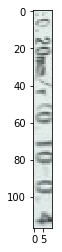

In [14]:
plt.imshow(reg.data[784][0])
plt.show()

In [ ]:
tx1=pd.read_csv('data\\txt'+'\\TB1d2ROQXXXXXc.XVXXXXXXXXXX_!!0-item_pic.jpg'+'.txt',header=None,quoting=3,sep='.[0-9]{1,2},',
                encoding='utf-8',engine='python')


In [ ]:
img = cv.imread(R'data\image\TB1d2ROQXXXXXc.XVXXXXXXXXXX_!!0-item_pic.jpg.jpg')
def drawline(x):
    print(x[8])
    pts = np.array([[x[0],x[1]],[x[6]+2,x[7]],[x[4]+2,x[5]+2],[x[2],x[3]+2]], np.int32)
    print(pts)
    for i in range(3):
        cv.line(img,tuple(pts[i%4]),tuple(pts[(i+1)%4]),(0,i*10,i*10),i*2+1)
    cv.imshow('img',img)
    cv.waitKey(0)
tx1.apply(drawline,axis=1)


cv.destroyAllWindows()

In [2]:
info.head(10)

NameError: name 'info' is not defined

In [80]:
import tensorflow as tf
tA=tf.constant([1,3,3.])
tB=tf.constant([3,1,1.])

rate=tf.constant([0.5,1.5,0.0])
tA=tA/rate
vs1=tA>tB
vs2=tA<=tB

sess=tf.Session()

In [82]:
res=tf.multiply(tA,tf.to_float(vs2))+tf.multiply(tB,tf.to_float(vs1))
vs1.eval(session=sess)

array([False,  True,  True])

In [84]:
res=tf.where(
    vs2,
    x=tA,
    y=tB,
    name=None
)
res.eval(session=sess)

array([2., 1., 1.], dtype=float32)

In [65]:
tf.multiply(now,tf.to_float(vs1)).eval(session=sess)

array([ 2.,  0., nan], dtype=float32)

In [69]:
tf.minimum(now,tA).eval(session=sess)

array([1., 2., 3.], dtype=float32)

In [70]:
import tensorflow as tf
with tf.Session():
    has_nans = tf.constant([float('NaN'), 1.])
    print(tf.where(tf.is_nan(has_nans), tf.zeros_like(has_nans), has_nans).eval())

[0. 1.]
